In [3]:
import os
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from typing import List, Any, Dict, Tuple

plt.rcParams['axes.grid'] = True


In [4]:
def two_body_eqm(_y, _t, _G, _m1, _m2):
    """
    differential equations of motion describing the 2-body problem
    _t: discrete time step value
    _y: state vector
    """
    
    # magnitude of position vector from r1 to r2
    r_mag = np.linalg.norm(_y[3:6] - _y[:3])
    # r_mag = np.sqrt((_y[0] - _y[3])**2 + (_y[1] - _y[4])**2)
    c0 = _y[6:12]
    c1 = _G * _m2 * ((_y[3:6] - _y[:3]) / np.power(r_mag, 3))
    c2 = _G * _m1 * ((_y[:3] - _y[3:6]) / np.power(r_mag, 3))
    return np.concatenate((c0, c1, c2))



In [5]:
def two_body_analytical(_r, _t, _omega, _phase, _G, _m1, _m2) -> Dict[str, Any]:
    """
    Analytical solution of the 2 body problem. Assuming e = 1
    """
    
    # Defining a dictionary in which I want to put my results as final distance, phase and angular velocity
    results = {}
    
    e = 1
    omega = np.sqrt(_G*(_m1 + _m2)/_r)
    phi = omega * _t
     
    
    # Angular momentum 'l = r^2 * phi_dot'
    l = _r * _r *  omega
    
    #Distance after a time _t
    r_mag_fin = l**l/((e * math.cos(omega * _t) + 1) * _G * (_m1 + _m2))
    
    #Filling the dictionary with the results
    results["distance"] = r_mag_fin
    results["phase"] = phi
    results["ang_vel"] = omega
    
    return results 

In [15]:
# Gravitation constant
# G = 6.67408e-11 (m**3/kg/s**2)
G = 1 

# Array of times
time = np.arange(0, 1, 0.1)

# m1 initial conditions
m1 = 1
r10 = np.array([0.9700436, -0.24308753, 0.])
v10 = np.array([0.466203685, 0.43236573, 0.])


# m2 initial conditions
m2 = 1
r20 = np.array([-0.9700436, 0.24308753, 0.])
v20 = np.array([0.466203685, 0.43236573, 0.])


# [X1 (0), Y1 (1), Z1 (2), X2 (3), Y2 (4), Z2 (5), VX1 (6), VY1 (7), VZ1 (8), VX2 (9), VY2 (10), VZ2 (11)]
y0 = np.concatenate((r10, r20, v10, v20))


Now I have to propagate the state, and write the results of the simulation

In [19]:
r = []
omega = []
phi = []

# Setting the initial distance. After each step, the distance should be the result of the previous step
r_initial = np.linalg.norm(y0[3:6] - y0[:3])
phi_init = 0
omega_init = np.sqrt(G*(m1 + m2)/r_initial)

for x in time:
    result = {}
    result = two_body_analytical(r_initial, omega_init, phi_init, x, G, m1, m2)
    r_initial = result["distance"]
    phi_init = result["phase"]
    omega_init = result["ang_vel"]
    r.append(r_initial)
    omega.append(omega_init)
    phi.append(phi_init)
        
print(r)
print(omega)
print(phi)

[83.14414594741069, inf, nan, nan, nan, nan, nan, nan, nan, nan]
[0.9999809676199979, 0.15509548654070912, 0.0, nan, nan, nan, nan, nan, nan, nan]
[0.9999619356022272, 0.15509253470447268, 0.0, nan, nan, nan, nan, nan, nan, nan]


C:\Users\simoa\AppData\Local\Temp\ipykernel_40572\1915850429.py:18: RuntimeWarning: overflow encountered in double_scalars
  r_mag_fin = l**l/((e * math.cos(omega * _t) + 1) * _G * (_m1 + _m2))
C:\Users\simoa\AppData\Local\Temp\ipykernel_40572\1915850429.py:15: RuntimeWarning: invalid value encountered in double_scalars
  l = _r * _r *  omega


Plotting the relative distance between the 2 particles

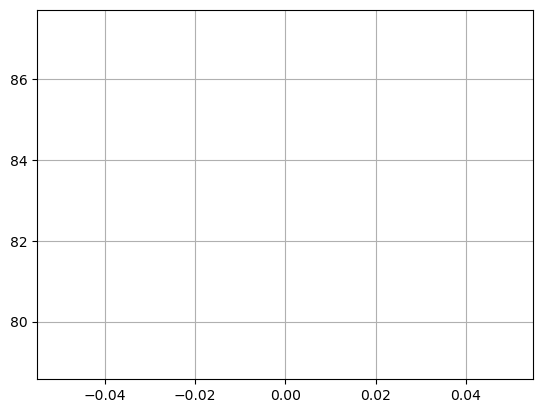

In [17]:
#config plot
import numpy as np
import matplotlib.pyplot as plt

plt.plot(time, r, "red")
